In [37]:

import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
path = '../data/physionet.org/files/ptb-xl/1.0.2/'
sampling_rate=100

# Load data

In [39]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [40]:

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))


# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

def aggregate_diagnostic_subclass(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_diagnostic_subclass)


Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,diagnostic_superclass,diagnostic_subclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,False,True,False,False,False,False,False,True,[STTC],[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,False,False,False,False,False,False,False,False,[STTC],[ISCA]


In [41]:

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)


In [42]:
X.shape

(21801, 1000, 12)

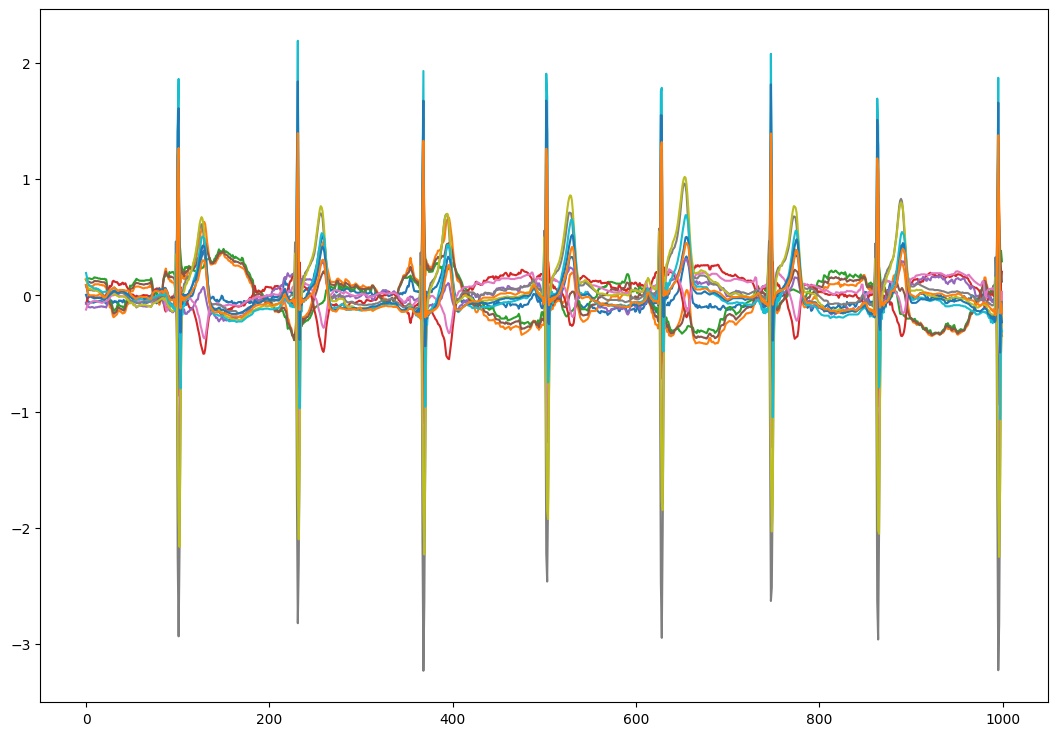

In [43]:
ecg_data = X[1]



fig, ax = plt.subplots(figsize=(13, 9))


# Create a line plot for each feature
for i, feature in enumerate(range(ecg_data.shape[1])):
    plt.plot(ecg_data[:, feature] , label=f'Feature {feature + 1}')
    
    

In [45]:
out = biosppy.signals.ecg.ecg(x, sampling_rate=100, show=False)  # assuming a sampling rate of 1000Hz

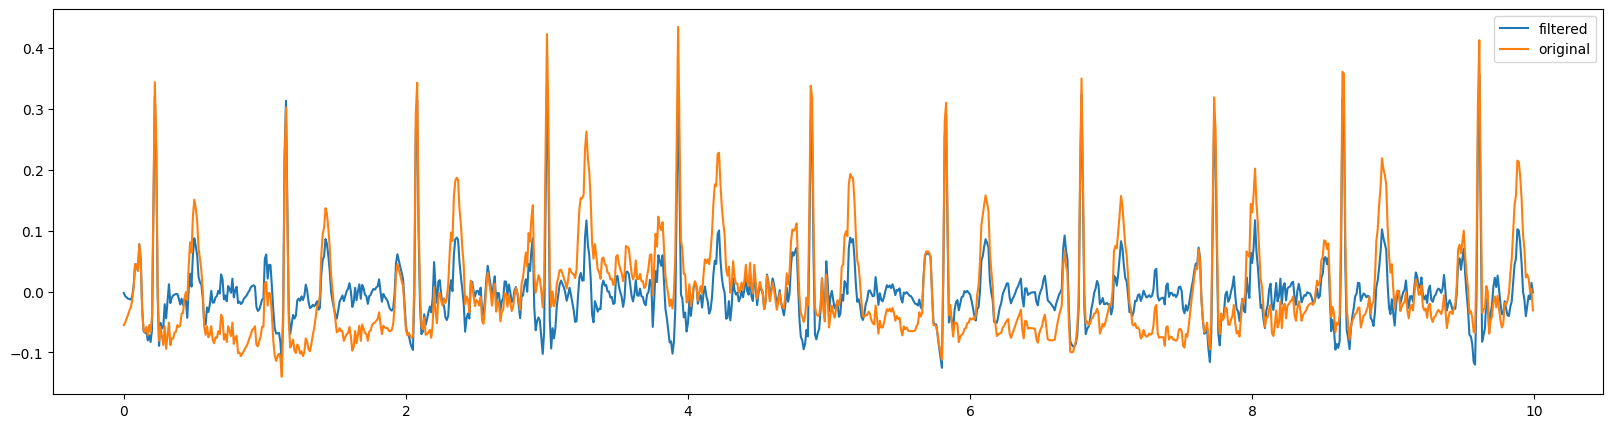

In [46]:


ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = out


plt.figure(figsize=(20, 5))

plt.plot(ts, filtered, label='filtered')
plt.plot(ts, x, label='original')



plt.legend()

In [47]:
heart_rate

array([64.51612903, 64.74988312, 64.74988312, 64.52110252, 63.61530542,
       62.94326241, 62.94326241, 64.08795106, 65.2326397 ])

(10, 60)


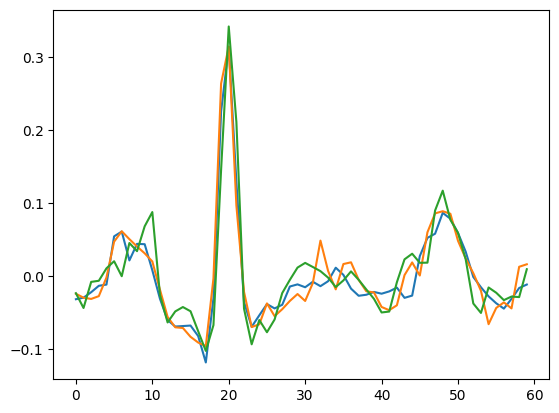

In [53]:
print(templates.shape)

plt.plot(templates[1])
plt.plot(templates[2])
plt.plot(templates[3])

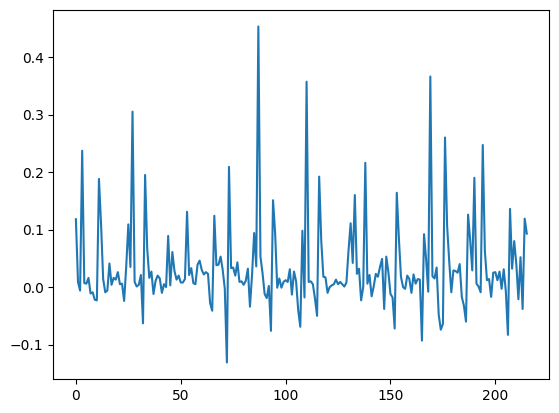

In [49]:
_, _, amplitudes = biosppy.signals.eda.basic_scr(x, sampling_rate=100)

plt.plot(amplitudes)